#How to Predict Weather with LSTM :)

---



- predict the average day temperature
- 9 variables

---








**data preprocessing**:





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file = pd.read_csv("/content/testset.csv")
file.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0,North,NaN,NaN,0.0


In [ ]:
file.columns = file.columns.str.lstrip() #remove os espacos em branco do nome das colunas
file.columns = file.columns.str.rstrip()

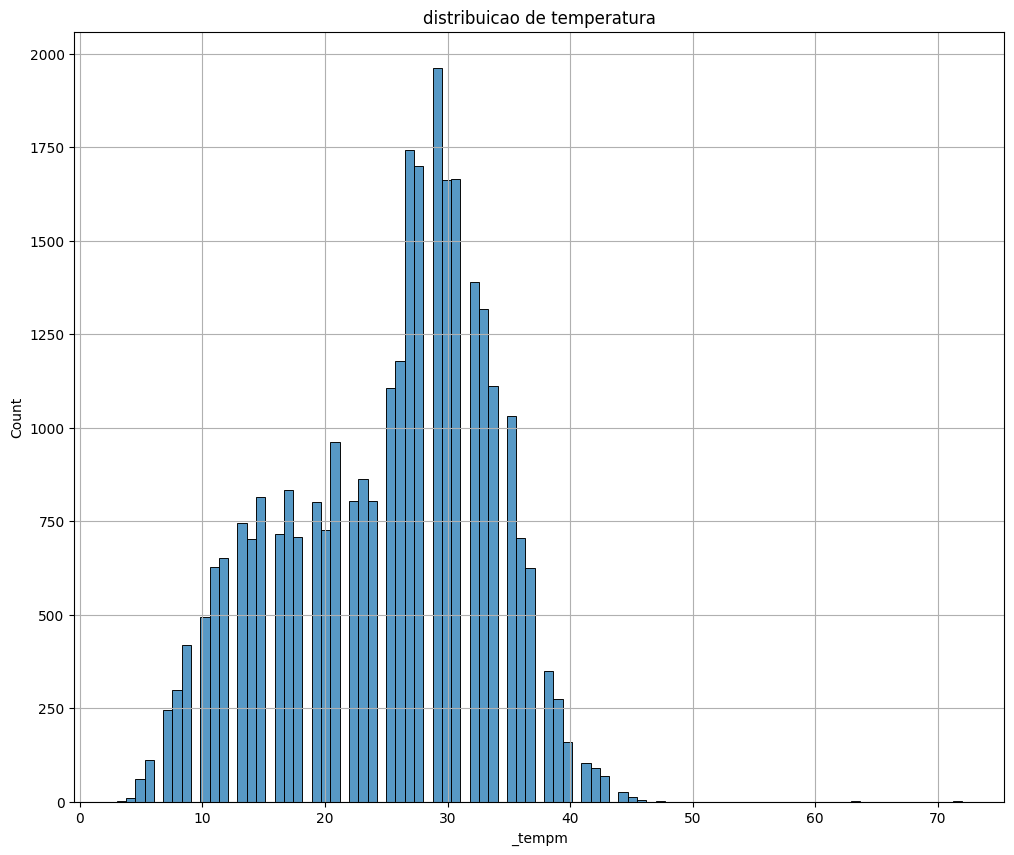

In [ ]:
plt.figure(figsize=(12,10))
sns.histplot(file._tempm)
plt.title("distribuicao de temperatura")
plt.grid()
plt.show()

In [ ]:
file.index = pd.to_datetime(file.datetime_utc)
file.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280,West,NaN,NaN,7.4
1996-11-01 12:00:00,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0,North,NaN,NaN,NaN
1996-11-01 13:00:00,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0,North,NaN,NaN,NaN
1996-11-01 14:00:00,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0,North,NaN,NaN,NaN
1996-11-01 16:00:00,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0,North,NaN,NaN,0.0


In [ ]:
colunas = ['_dewptm','_fog','_hail','_hum','_rain','_snow','_tempm','_thunder','_tornado']
file = file[colunas]
file.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0


In [ ]:
file.isna().sum() #numero de valores ausentes NaN nos dados

_dewptm     310
_fog          0
_hail         0
_hum        328
_rain         0
_snow         0
_tempm      317
_thunder      0
_tornado      0
dtype: int64

In [ ]:
file = file.fillna(method='ffill') #substitui o ultimo valor valio no campo vazio
file.isna().sum()

_dewptm     0
_fog        0
_hail       0
_hum        0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

In [ ]:
file =  file.resample('D').mean() #tira a hora e deixa so a data
file.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,48.625000,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,55.958333,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,48.055556,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,29.400000,0.0,0.0,27.800000,0.0,0.0


In [ ]:
file.isna().sum()

_dewptm     140
_fog        140
_hail       140
_hum        140
_rain       140
_snow       140
_tempm      140
_thunder    140
_tornado    140
dtype: int64

In [ ]:
file=file.fillna(method='ffill')
file.isna().sum()

_dewptm     0
_fog        0
_hail       0
_hum        0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

**model training**:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler() #entre 0 e 1
scaled_data = scaler.fit_transform(file)

# Define sequence length and features
sequence_length = 10  # Number of time steps in each sequence
num_features = len(file.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][6]  # '_tempm' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]  #linhas (x) para test e train
train_y, test_y = labels[:train_size], labels[train_size:] #features (y) pra test e train

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (1486, 10, 9)
Train Y shape: (1486,)
Test X shape: (372, 10, 9)
Test Y shape: (372,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))   #reduzir overfitting

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

a camada final dense e tipica pra problemas de regressao ou classificacao binaria

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           70656     
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) #vai tentar no max 5 vezes
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/dl/weather_prediction/best_model_weights.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
19/19 [==============================] - 8s 105ms/step - loss: 0.0870 - val_loss: 0.0197
Epoch 2/100
 5/19 [======>.......................] - ETA: 0s - loss: 0.0174

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 1s 37ms/step - loss: 0.0167 - val_loss: 0.0103
Epoch 3/100
19/19 [==============================] - 1s 36ms/step - loss: 0.0125 - val_loss: 0.0107
Epoch 4/100
19/19 [==============================] - 1s 36ms/step - loss: 0.0111 - val_loss: 0.0115
Epoch 5/100
19/19 [==============================] - 1s 36ms/step - loss: 0.0098 - val_loss: 0.0143
Epoch 6/100
19/19 [==============================] - 1s 37ms/step - loss: 0.0105 - val_loss: 0.0165
Epoch 7/100
19/19 [==============================] - 1s 38ms/step - loss: 0.0099 - val_loss: 0.0184


In [ ]:
# Evaluate the best model on the test set
import tensorflow as tf

best_model = tf.keras.models.load_model('/content/drive/MyDrive/dl/weather_prediction/best_model_weights.h5')
test_loss = best_model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)

12/12 [==============================] - 1s 8ms/step - loss: 0.0070
Test Loss: 0.007041638251394033


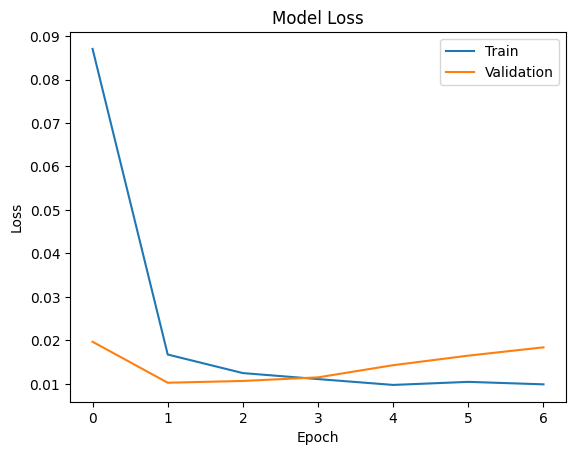

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have trained the model and have the 'best_model' object
# Also, 'test_x' and 'test_y' should be available

# Predict temperatures using the trained model
predictions = best_model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

12/12 [==============================] - 1s 7ms/step
Mean Absolute Error (MAE): 0.0642062874554769
Mean Squared Error (MSE): 0.007041637990826609
Root Mean Squared Error (RMSE): 0.08391446830449806


In [ ]:
# y_true values
test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
true_temp = scaler.inverse_transform(test_y_copies)[:,6]

# predicted values
prediction = best_model.predict(test_x)
prediction_copies = np.repeat(prediction, 9, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:,6]

12/12 [==============================] - 0s 21ms/step


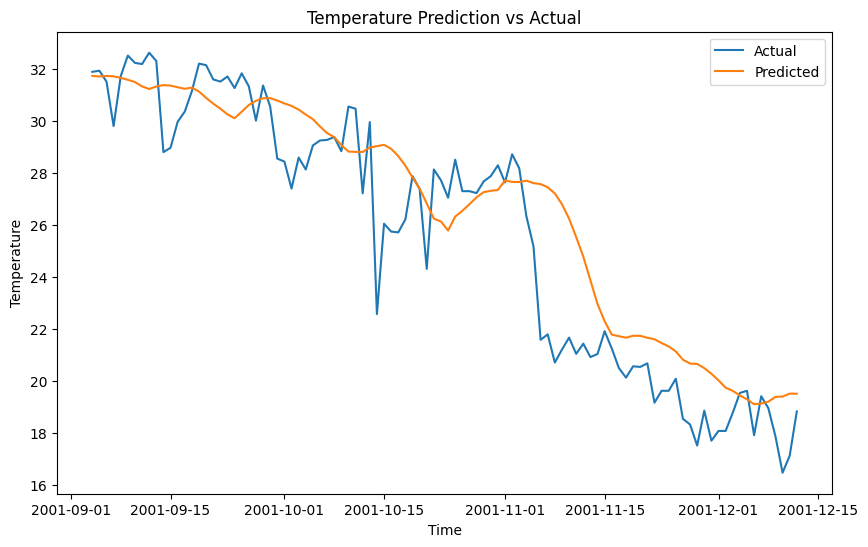

In [ ]:
# Plotting predicted and actual temperatures
plt.figure(figsize=(10, 6))
plt.plot(file.index[-100:], true_temp[-100:], label='Actual')
plt.plot(file.index[-100:], predicted_temp[-100:], label='Predicted')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()